### CNN from scratch 

Performance was poor - see transfer_learning.ipynb for final model.

In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:
train_path = 'per_imgs/dataset_3/train'
val_path = 'per_imgs/dataset_3/val'

In [33]:
train_batches = ImageDataGenerator(preprocessing_function=keras.applications.vgg16.preprocess_input, 
                               width_shift_range=0.2, 
                               height_shift_range=0.2) \
    .flow_from_directory(directory = train_path, target_size = (256, 256), 
                         classes = ['neg', 'pos'], batch_size = 10)

val_batches = ImageDataGenerator(preprocessing_function=keras.applications.vgg16.preprocess_input, 
                                width_shift_range=0.2, 
                               height_shift_range=0.2) \
    .flow_from_directory(directory = val_path, target_size = (256, 256), 
                         classes = ['neg', 'pos'], batch_size = 10)

Found 1648 images belonging to 2 classes.
Found 463 images belonging to 2 classes.


In [34]:
model_6_1 = Sequential([
    Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same', input_shape=(256, 256, 3)),
    Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
    Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),    
    Conv2D(filters = 256, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),    
    Conv2D(filters = 512, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2), 
    Flatten(),
    Dense(units=2, activation='softmax')])

In [140]:
# another option is to use binary_crossentropy and using sigmoid
# as the activation function for the output layer, which will 
# result in one output node

In [36]:
model_6_1.compile(optimizer=Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [37]:
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta = 0.01, patience=4)

In [4]:
model_6_1.fit(x = train_batches, validation_data = val_batches, callbacks=[callback], epochs = 15)

In [131]:
model_5_1.save('models/model_5_1.h5')

In [21]:
# from tensorflow.keras.models import load_model
# model = load_model('models/model_3.h5')

In [15]:
test_path = 'per_imgs/dataset_3/test'
test_2_path = 'per_imgs/dataset_3/test2'

In [16]:
test_batches = ImageDataGenerator(preprocessing_function=keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory = test_path, target_size = (256, 256), 
                         classes = ['neg', 'pos'], batch_size = 10, shuffle = False)
test_2_batches = ImageDataGenerator(preprocessing_function=keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory = test_2_path, target_size = (256, 256), 
                         classes = ['neg', 'pos'], batch_size = 10, shuffle = False)

Found 199 images belonging to 2 classes.
Found 152 images belonging to 2 classes.


In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools

In [40]:
def make_plot_predictions(test_batch, model):
    cm_plot_labels = ['neg', 'pos']
    predictions = model.predict(x = test_batch, verbose = 0)
    cm = confusion_matrix(y_true=test_batch.classes, y_pred = np.argmax(predictions, axis = -1))
    return plot_confusion_matrix(cm = cm, classes = cm_plot_labels, title = 'Confusion Matrix')

Confusion matrix, without normalization
[[108   0]
 [ 74  17]]


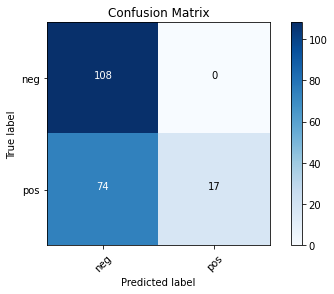

In [41]:
make_plot_predictions(test_batches, model_5_1)

Confusion matrix, without normalization
[[60 48]
 [ 6 85]]


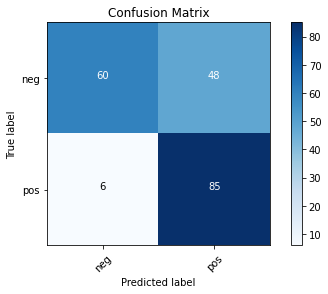

In [128]:
make_plot_predictions(test_batches, model_4_1)

Confusion matrix, without normalization
[[123  13]
 [ 16   0]]


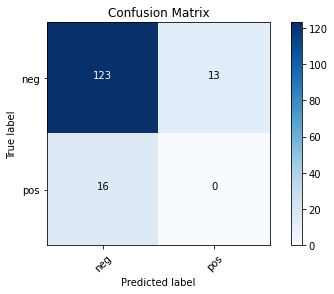

In [129]:
make_plot_predictions(test_2_batches, model_3_1)